In [1]:
from scipy import signal
import sympy as sp
import math
%run 'notes.ipynb' # holds notes + SP specific functions
%run 'shared_functions.ipynb' # holds non-SP specific functions

In today's exercise we will apply the same 1st order analog LP-filter as we discussed in the lecture.
We will apply the following values for the resistor and the capacitor; 1 kilo Ohm and 1 micro Farad, respectively.
We want to design an equivalent digital filter, using the impulse invariant method.
The sample frequency is 8 kHz.

- $R = 1 k\Omega$
- $C = 1 \mu$F
- $f_s = 8 KHz$
- 1st order analog LP-filter
- impulse variant method

# 1)
Write a mathematical expression for the discrete-time impulse response and do a "paper & pencil" calculation of the first 5 values.

We can solve it by using the formulas in the notes [here](notes.ipynb#digital-d-impulse-response)

$$
T = \frac{1}{8 \cdot 10^3} = 125 \cdot 10^{-6}
$$

$$
h[n] 
= \frac{T}{RC} e^{-\frac{nT}{RC}}
= \frac{125 \cdot 10^{-6}}{10^3 \cdot 10^{-6}} e^{-\frac{n \cdot 125 \cdot 10^{-6}}{10^3 \cdot 10^{-6}}}
= \frac{125}{10^3} e^{-\frac{n \cdot 125}{10^3}}
= 0.125 e^{-n \cdot 0.125}
$$


In [2]:
r = 10**3
c = 10**(-6)
fs = 8*10**3

T = 1/fs

hn = lambda n: (T/(r*c))*math.exp(-(n*T)/(r*c))

for x in range(0, 5):
    display("{} | {}".format(x, hn(x)))

'0 | 0.125'

'1 | 0.11031211282307443'

'2 | 0.09735009788392561'

'3 | 0.08591115984887153'

'4 | 0.07581633246407918'

# 2)
Write a mathematical expression for the filter I/O relation in terms of the convolution sum.
Use this expression to calculate the first 50 samples of the step response from the filter.
In this exercise, which needs to be solved by writing a small program (Matlab, Python, C, ...), you may want to apply e.g., 100 terms in the convolution sum.
Explain why you can do with only 100 terms

From the notes [here](notes.ipynb#digital-d-convolution-sum), we can calculate the function and plot it.
Look at the function for more info, check suggested solution if there is anything more.

You can always want more products, but there is a need to find a middleground between how much computing power.
It also looks good at 40, but below that it becomes crummy and unclear, check the code below if you want.

k determines the resolution of your calculation.

[0.125, 0.23531211282307443, 0.33266221070700003, 0.41857337055587157, 0.4943897030199508, 0.5612973815848246, 0.6203432006774514, 0.672450953137265, 0.7184358832836952, 0.759017441703489, 0.7948305413110127, 0.826435490786606, 0.8543267608051598, 0.878940720205684, 0.9006624631369897, 0.9198318339926058, 0.9367487443971824, 0.9516778654305224, 0.9648527685007554, 0.9764795796520883, 0.9867402044800757, 0.9957951741093571, 1.0037861567601956, 1.0108381741981678, 1.0170615577441509, 1.0225536744470767, 1.027400450426042, 1.031677715215, 1.03545238814279, 1.0387835253098343, 1.0417232435418355, 1.044317535776048, 1.0466069906371396, 1.0486274274606604, 1.0504104566992853, 1.0519839744795896, 1.0533725990468699, 1.0545980559263477, 1.0556795178267377, 1.0566339046040953, 1.057476147978981, 1.05821942514854, 1.0588753649484377, 1.0594542297901293, 1.0599650762199373, 1.0604158966119392, 1.0608137442115029, 1.0611648434858185, 1.0614746875079017, 1.0617481238976747]


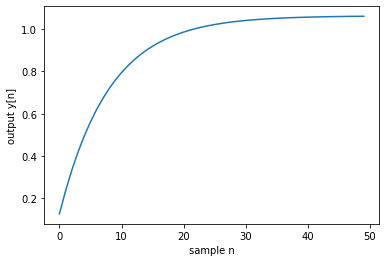

In [3]:
# use 80 in first argument in convolutionSum, to get 1.064 instea
# for x in [100, 40, 20, 10]:
for x in [100]:
    convolutionSum(50, x, lambda k: 0.125 * math.exp(-k*0.125), printy=True)

## 3)
Write a mathematical expression for the filter transfer function.
Find the poles and the zeros and plot these in the z-plane.
Is the filter stable -- and why/why not..??


The transfer function for a discrete-time can be seen [here](notes.ipynb#digital-d-tf).
We can then calculate $a$ and $b$

$$
\begin{align}
a &= 
e^{-\frac{T}{RC}} 
= e^{-\frac{125 \cdot 10^{-6}}{10^3 \cdot 10^{-6}}}
= e^{-\frac{125}{10^3}}
= e^{-0.125}
= 0.8825 \\
b &= 0.125 \\
H(z) &= \frac{0.125}{1-0.8825z^{-1}}
\end{align}
$$


We then use the rewritten form, to write our expression as

$$
H(z) = \frac{0.125z}{z-0.8825}
$$

This give us our zeros as

$$
0.125z = 0 \Rightarrow z = \frac{0}{0.125} = 0
$$

And our poles as 

$$
z-0.8825 = 0 \Rightarrow z = 0.8825
$$

Our pole(s) are inside the unit circle, therefore it is stable.
See notes for qoute frow wiki regarding this.

We can plot this like below:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5f7d7ca290>)

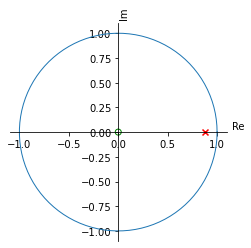

In [4]:
num = [0.125, 0]
den = [1, -0.8825]

tf = signal.TransferFunction(num, den)
plotPoles(tf.poles, tf.zeros)

## 4)
Write a mathematical expression for the filter I/O relation in terms of the difference equation.
In the file signal_noise.dat you'll find 1000 samples of a noise contaminated signal that we want to filter using our designed filter (the signal is a damped sinusoid with f=80Hz superimposed with a Gaussian distributed white noise component).
The difference equation is implemented in terms of a program which is next used to conduct the filtering.

The differnce equation is given by:

$$
\begin{align}
H(z) &= 
\frac{Y(z)}{X(z)}
= \frac{b}{1-az^{-1}} \\
Y(z) (1-az^{-1}) &= bX(z) \\
Y(z) &= aY(z)z^{-1} + bX(z) \\
y[n] &= ay[n-1] + bx[n] \\
y[n] &= 0.8825y[n-1] + 0.125x[n] \\
\end{align}
$$

This we will use below, and it does match the code below.

We have the pseudo code from the slides, MM6.S30

```
y_old := 0; /* Initialize the variable y_old
START /* Start label
x := ADC; /* Read the next value from the ADC
y_new := a*y_old + b*x; /* Calculate the difference equation
DAC := y_new; /* Write the result to the DAC
y_old := y_new; /* Update the variable y_old
GOTO START /* Jump to start
```


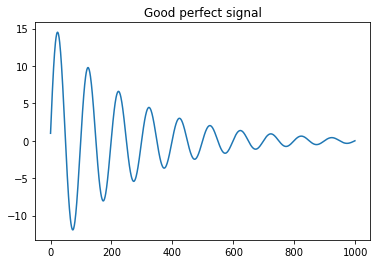

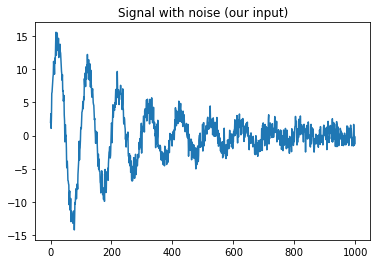

In [8]:
dataPoints = 1000

fileSignalNoise = "data/signal_noise.dat"
fileSignal = "data/signal.dat"

def loadData(filename):
    data = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        for line in lines:
            data.append(float(line))
    return data

# this is the signal we want
signal = loadData(fileSignal)
# this is the signal we are reading from the wire
signalNoise = loadData(fileSignalNoise)

y = [0]*dataPoints

# give it a initial old to use ( * 0 just for clarity)
y[0] = 0.8825 * 0 + 0.125 * signalNoise[0]
for n in range(1,1000):
    y[n] = 0.8825 * y[n-1] + 0.125 * signalNoise[n]

def plotFigure(x, y, title):
    fig, ax = plt.subplots()    
    ax.plot(x,y)
    ax.set_title(title)
    
x = np.arange(dataPoints)

plotFigure(x, signal, "Good perfect signal")
plotFigure(x, signalNoise, "Signal with noise (our input)")
plotFigure(x, y, "Filtered")

## 5)
Write mathematical expressions for the filter frequency response and amplitude response, respectively.
Next, draft the amplitude response.
Finally, calculate where the 3dB frequency is located -- both for the analog and the digital filter.
Discuss whether the analog and the digital filters are identical in terms of the 3dB frequency.

For finding the responses, see notes for freqency and amplitude response.
First we will find the freqency response (use the formula from earlier).

$$
H(z) 
= \left. \frac{0.125z}{z-0.8825} \right|_{z=e^{j\omega}}
= \frac{0.125 e^{j\omega}}{e^{j\omega}-0.8825}
$$

Now for the amplitude response (we take the absolute value of the imginary number here, and use the idiot formula, keep that in mind.
Also note, that \omegae use $a = \cos{(\omega)}-0.8825$, at some point.

$$
\begin{align}
H(z) 
&= \left.\frac{0.125z}{z-0.8825}\right|_{z=\cos{(\omega)}+j\sin{(\omega)}}
= \frac{0.125(\cos{(\omega)}+j\sin{(\omega)})}{\cos{(\omega)}+j\sin{(\omega)}-0.8825}
= \frac{|0.125(\cos{(\omega)}+j\sin{(\omega)})|}{|\cos{(\omega)}+j\sin{(\omega)}-0.8825|} \\
&= \frac{0.125|(\cos{(\omega)}+j\sin{(\omega)})|}{|\cos{(\omega)}+j\sin{(\omega)}-0.8825|}
= \frac{0.125\sqrt{\cos{(\omega)}^2+\sin{(\omega)}^2}}{\sqrt{(\cos{(\omega)}-0.8825)^2}+\sin{(\omega)}^2}
= \frac{
0.125
}{
\sqrt{(\cos{(\omega)}-0.8825)^2}+\sin{(\omega)}^2
}
\end{align}
$$

Now we can plot that using Python

In [6]:
dp = 100
exp = lambda i: 0.125/math.sqrt( (math.cos(i)-0.8825)**2 + math.sin(i)**2 )

# generate our arrays
omega = (np.arange(dp+1) * np.pi)/(dp)
amplitude = np.array([exp(omega[x]) for x in range(dp+1)])

# plot it
fig, ax = plt.subplots()
ax.grid(b=True, which="both")
ax.set_ylabel("Amplitude")
ax.set_xlabel("Freqency")
ax.plot(omega, amplitude)

display(amplitude[0])

1.063829787234042

From the assignment solution (translated, read slides for original):

```
Note that the filter has a DC-amplification that is equal to 1.064.
That means, that if we put (påtrykker) x[n]=1 as input (a DC - altså en DC)
then the system will answer with the value y[n]=1.064 - and that was what
we experienced in the convolutionSum assignment, where it convolutes to that.
```

Now we need to do the following:

```
Finally, calculate where the 3dB frequency is located -- both for the analog and the digital filter.
Discuss whether the analog and the digital filters are identical in terms of the 3dB frequency.
```

From the slides, we get the transfer function for the analog circuit (MM6.S20, check notes).

We again get the freqency response, and take the absolute value (remember imaginary part)

$$
\left|H(j\Omega)\right|
=\left|\frac{1}{j\Omega RC + 1}\right|
=\left|\frac{1}{1 + j\Omega RC}\right|
=\frac{1}{\sqrt{1 + (\Omega RC)^2}}
$$
 
The 3 dB freqency is the freqency where the amplitude has decreased 3 dB as related to DC ($\Omega = 0$, where it is 0).
Fro this we get the following equation (read the rules about log, we will use $log_a(b)=c \rightarrow b=a^c$:


$$
\begin{align}
-3 dB = 20 log_{10}(x) \\
\frac{-3 dB}{20} = log_{10}(x) \\
10^{\frac{-3 dB}{20}} = x \\
x = 0.7079 \approx \frac{1}{\sqrt{2}}
\end{align}
$$

Now we want to get the value, when our filter has fallen $\frac{1}{\sqrt{2}}$, we can find this be multiplying our $H(e^{j0}$ with the amount it needs to fall.
We however alread know, that it is $\frac{1}{\sqrt{2}}$, since the cut-off freqency is normalized.

$$
\frac{1}{\sqrt{2}} \cdot H(e^{j0})
$$

We want to first get the frequency for our analog filter, so we will calculate the value for $H(e^{j0})$ first.

$$
\left| H(j\omega) \right|_{-3 dB} = \frac{1}{\sqrt(2)} \left| H(j0) \right| = \frac{1}{\sqrt{2}} \frac{1}{1 + 0} = \frac{1}{\sqrt{2}}
$$

Now we can set it equal to our last equation, to get the actual value for $\Omega = 2 \pi f$

Thereby we get
$$
\left| H(j\Omega) \right|_{-3 dB} = \frac{1}{\sqrt{2}} = \frac{1}{\sqrt{1+(\Omega RC)^2}}
$$

From that we get

$$
\begin{align}
1 &= \Omega RC \\
\Omega &= \frac{1}{RC} \\
2\pi f &= \frac{1}{RC} \\
f &= \frac{\frac{1}{RC}}{2 \pi} \\
f &= \frac{1}{2RC\pi} = \frac{1}{2 \cdot 10^3 \cdot 10^{-6} \pi} = 159 Hz \\
\end{align}
$$


Similary we can calculate the freqency for the discrete-time filter, using the equation from before.

$$
H(e^{j\omega})
= \frac{0.125 e^{j\omega}}{e^{j\omega}-0.8825}
$$

THIS IS OLD, NOT SURE THIS IS CORRECT, BUT IT SAYS SOMEWHAT THE SAME AS BELOW
The below I am NOT sure of, but it is my best guess.
We know that if we gave our system $x[1]$, it would output $y[1.0638]$, we need to normalize this somehow.
We therefore do the following, with our equation from earlier, to find our 0 DC value, for -3 dB.

We need to know the value, it drops to to -3 dB ($\frac{1}{\sqrt{2}}$), therefore we do the same as before.
We do not know, if this filter is normalized, that is the reason why we are doing the below.

$$
\left| H(j\omega) \right|_{-3 dB} = \frac{1}{\sqrt{2}} \cdot H(e^{j \cdot 0}) = \frac{1.0638}{\sqrt{2}} = 0.7522
$$

We could also find the DC value, by reading the graph we made earlier with the amplitude response (I am guessing).

We then put that into our equation, and solve for $\omega$.

$$
\left| H(j\omega) \right|_{-3 dB} = \frac{
0.125
}{
\sqrt{(\cos{(\omega)}-0.8825)^2}+\sin{(\omega)}^2
}
= \frac{1.0638}{\sqrt{2}}
$$

We do this in Python, including getting the freqency, by using the formula: $\omega = \frac{2\pi f_{3 dB}}{f_s}$ (most important formula).

In [7]:
fs = 8*10**3
w = sp.symbols("w_{3dB}", positive=True)

# this is our 1.0638/sqrt(2), but more accurate
digitalDb = (0.125/(1-0.8825))/math.sqrt(2)

expDen = sp.sqrt((sp.cos(w)-0.8825)**2+sp.sin(w)**2)
exp = sp.Eq(digitalDb, 0.125/expDen)

w = sp.solve(exp, w)[0]

f = (w*fs)/(2*sp.pi)
display(exp)
display(w)
display(f.evalf())

Eq(0.752241256581433, 0.125/sqrt((cos(w_{3dB}) - 0.8825)**2 + sin(w_{3dB})**2))

0.125159555665563

159.358095674877

Thereby we can see, that the two are identical.